
# Object detection using Transfer Learning of CNN architectures 

In [1]:
# a. Load in a pre-trained CNN model trained on a large dataset
# b. Freeze parameters (weights) in model’s lower convolutional layers 
# c. Add custom classifier with several layers of trainable parameters to model
# d. Train classifier layers on training data available for task 
# e. Fine-tune hyper parameters and unfreeze more layers as needed

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [23]:
 dataset_dir = "C:/Users/kaler/Downloads/caltech-101-img/caltech-101-img"

In [24]:
dataset_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
 )
# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
 )

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]
print(len(x_train))
print(len(x_test))

2000
2000


In [6]:
 # a. Load in a pre-trained CNN model trained on a large dataset
 # Load VGG16 without top layers
weights_path = "C:/Users/kaler/OneDrive/Desktop/BE/DL/Practicles/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False,
input_shape=(64, 64, 3))

In [7]:
# b. Freeze parameters (weights) in model’s lower convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# c. Add custom classifier with several layers of trainable parameters to model
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy',
metrics=['accuracy'])

In [9]:
# d. Train classifier layers on training data available for task
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10,
validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1358 - loss: 4.1714 - val_accuracy: 0.3100 - val_loss: 3.3108
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3282 - loss: 3.1351 - val_accuracy: 0.3960 - val_loss: 2.8827
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4753 - loss: 2.4746 - val_accuracy: 0.4340 - val_loss: 2.5524
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5286 - loss: 2.1399 - val_accuracy: 0.4860 - val_loss: 2.3339
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6176 - loss: 1.8171 - val_accuracy: 0.5095 - val_loss: 2.1621
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6755 - loss: 1.4980 - val_accuracy: 0.5095 - val_loss: 2.0580
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7005 - loss: 1.3615 - val_accuracy: 0.5415 - val_loss: 1.9727
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7679 - loss: 1.1526 - val_accuracy: 0.5475 - val_loss:

In [10]:
# e. Fine-tune hyper parameters and unfreeze more layers as needed
base_model = VGG16(weights=weights_path, include_top=False,
input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
    layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers)- 2:]:
    layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

In [11]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10,
validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2666 - loss: 3.7053 - val_accuracy: 0.4620 - val_loss: 2.3838
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5421 - loss: 1.9238 - val_accuracy: 0.5480 - val_loss: 1.9204
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6884 - loss: 1.2261 - val_accuracy: 0.5835 - val_loss: 1.7969
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8119 - loss: 0.7080 - val_accuracy: 0.5955 - val_loss: 1.7249
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8653 - loss: 0.4622 - val_accuracy: 0.6160 - val_loss: 1.6906
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9226 - loss: 0.2807 - val_accuracy: 0.6080 - val_loss: 1.8411
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9640 - loss: 0.1587 - val_accuracy: 0.6195 - val_loss: 1.8543
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9686 - loss: 0.1205 - val_accuracy: 0.6345 - val_loss:

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step
Preditcted:  Faces
Actual:  Faces_easy


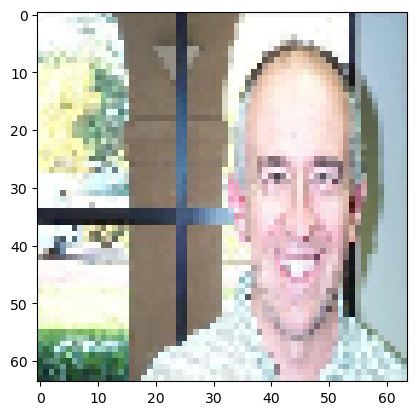

In [21]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())
n =1111
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])